# VGG16 - DJI Panthom


## Importing and defining model

In [1]:
from keras.applications.vgg16 import VGG16
# model = VGG16()

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [3]:
# Define the image size accepted by VGG16
IMAGE_SIZE = [224, 224]

# Define path to dataset if available
# train_path = 'path_to_train_dataset'
# valid_path = 'path_to_validation_dataset'

In [4]:
# Load VGG16 without the head and include preprocessing
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Don't train existing weights
vgg.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Specify the path to your dataset
dataset_path = '/content/drive/MyDrive/Final Year Project/AI/dataset_panthom'

print(dataset_path)
# Useful for getting number of classes
folders = dataset_path
folders

/content/drive/MyDrive/Final Year Project/AI/dataset_panthom


'/content/drive/MyDrive/Final Year Project/AI/dataset_panthom'

In [7]:
os.listdir(dataset_path)

['env', 'Drone_Panthom']

In [8]:
# Adding custom layers
x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)  # Change for binary classification

# Create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
# Model compilation for binary classification
model.compile(
  loss='binary_crossentropy',  # Change for binary classification
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# View the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 40,406,849 (154.14 MB)

 Trainable params: 25,692,161 (98.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Data preprocessing

In [11]:
data = tf.keras.utils.image_dataset_from_directory(dataset_path, image_size=(224,224))
data_iterator  = data.as_numpy_iterator()
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
print('max: ', batch[0].max())
print('min: ', batch[0].min())

Found 1767 files belonging to 2 classes.
max:  1.0
min:  0.0


In [12]:
print(batch[1])

[0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1]


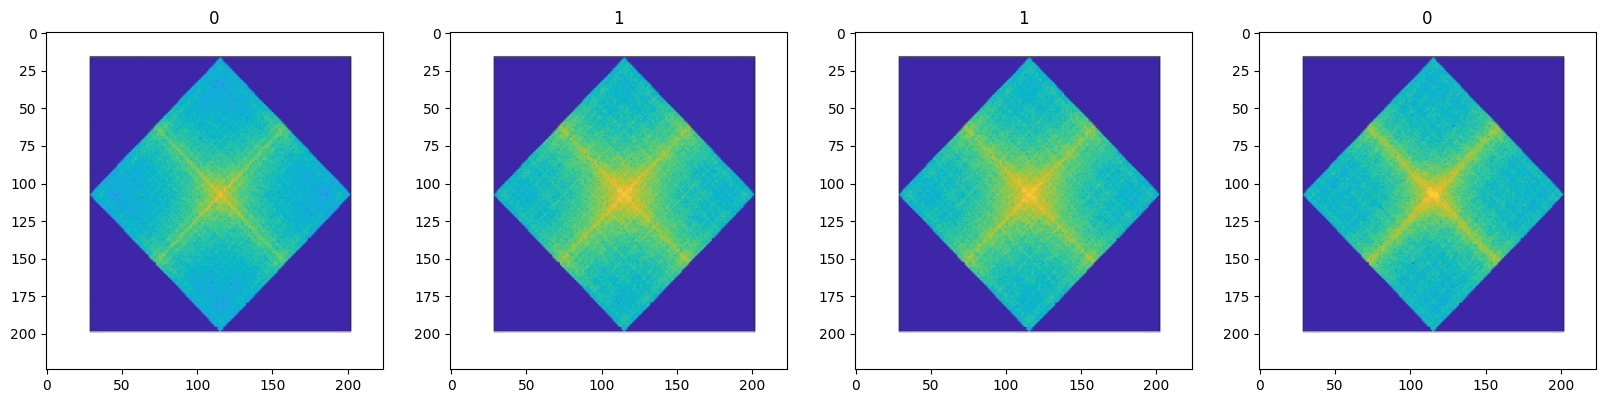

In [13]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [14]:
train_size = int(len(data)*0.7)

# Used to evaulate the data while we train
val_size = int(len(data)*0.2)

# Not seen until the end of the training
test_size = int(len(data)*0.1)

print('First Iteration :', train_size, val_size, test_size)


addition_data = train_size+val_size+test_size
if addition_data == len(data):
  pass
else:
  additional = len(data) - addition_data
  test_size += additional

print('Second Iteration :', train_size, val_size, test_size)
print('Total Length = ', len(data))
print('Sum of length = ', (train_size + val_size + test_size))

First Iteration : 39 11 5
Second Iteration : 39 11 6
Total Length =  56
Sum of length =  56


In [15]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size+val_size).take(test_size)
print(train_data)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [16]:
# Assuming train_data, val_data, and test_data are already batched and preprocessed
# Configure the datasets for performance
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

## Training the model

In [17]:
# Fit the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.4925 - loss: 3.1099 - val_accuracy: 0.6165 - val_loss: 0.6485
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.6768 - loss: 0.6451 - val_accuracy: 0.7955 - val_loss: 0.5646
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.7975 - loss: 0.5651 - val_accuracy: 0.8409 - val_loss: 0.4569
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.8751 - loss: 0.4508 - val_accuracy: 0.9375 - val_loss: 0.3476
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.8958 - loss: 0.3573 - val_accuracy: 0.9347 - val_loss: 0.2713
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.9086 - loss: 0.2965 - val_accuracy: 0.9403 - val_loss: 0.2287
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.9325 - loss: 0.2387 - val_accuracy: 0.9460 - val_loss: 0.2015
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.9395 - loss: 0.2137 - val_accuracy

Implementing early stopping

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Set up early stopping
# early_stopping_monitor = EarlyStopping(
#     monitor='val_loss',
#     patience=5,  # Number of epochs with no improvement after which training will be stopped
#     verbose=1,
#     restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity.
# )

# # Fit the model with early stopping
# history = model.fit(
#     train_data,
#     validation_data=val_data,
#     epochs=100,  # Set a high number, early stopping will halt training once learning stagnates
#     callbacks=[early_stopping_monitor]
# )


In [18]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9580 - loss: 0.1264
Test accuracy: 0.9580838084220886, Test loss: 0.13255925476551056


## Plot Performance

In [19]:
# Predictions
predictions = model.predict(test_data)
predictions = (predictions > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Get true labels from the test_data
true_labels = np.concatenate([y for x, y in test_data], axis=0)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step


In [20]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[61  4]
 [ 3 99]]


Confusion matrix, without normalization
Normalized confusion matrix


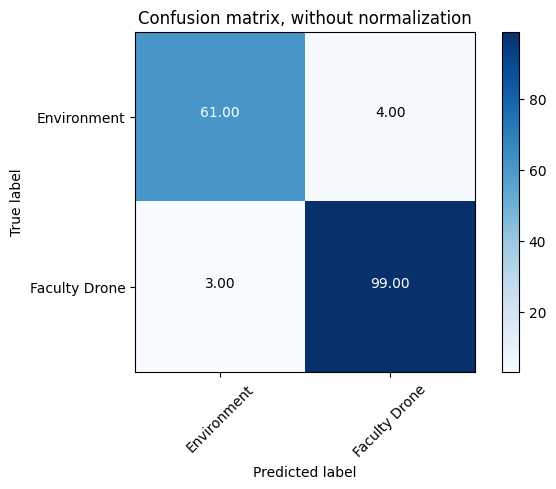

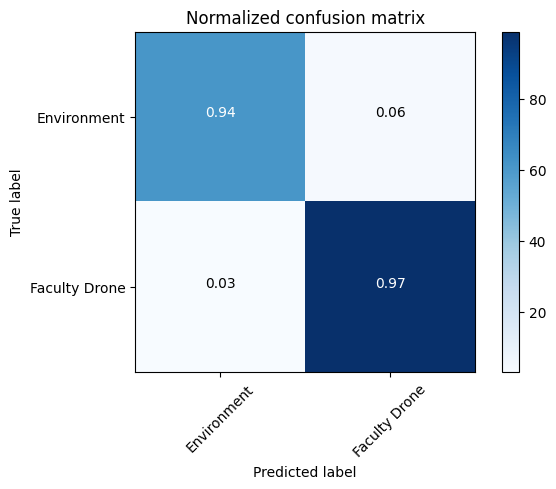

In [21]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming the confusion matrix 'cm' and class labels are already defined
# Example usage of the function
plt.figure()
plot_confusion_matrix(cm, classes=['Environment', 'Faculty Drone'], normalize=False,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cm, classes=['Environment', 'Faculty Drone'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [22]:
# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predictions, target_names=['Environment', 'Faculty Drone']))

Classification Report:
               precision    recall  f1-score   support

  Environment       0.95      0.94      0.95        65
Faculty Drone       0.96      0.97      0.97       102

     accuracy                           0.96       167
    macro avg       0.96      0.95      0.96       167
 weighted avg       0.96      0.96      0.96       167



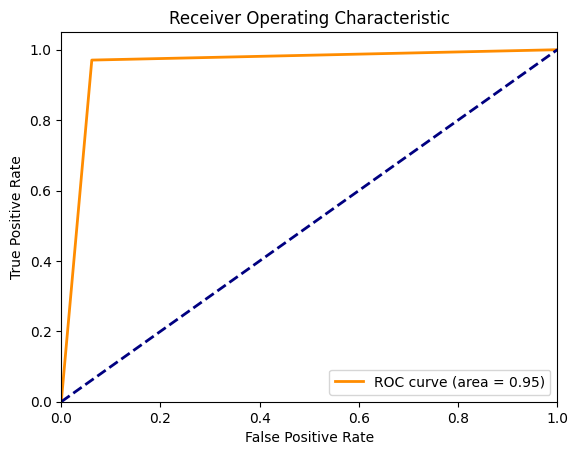

In [23]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

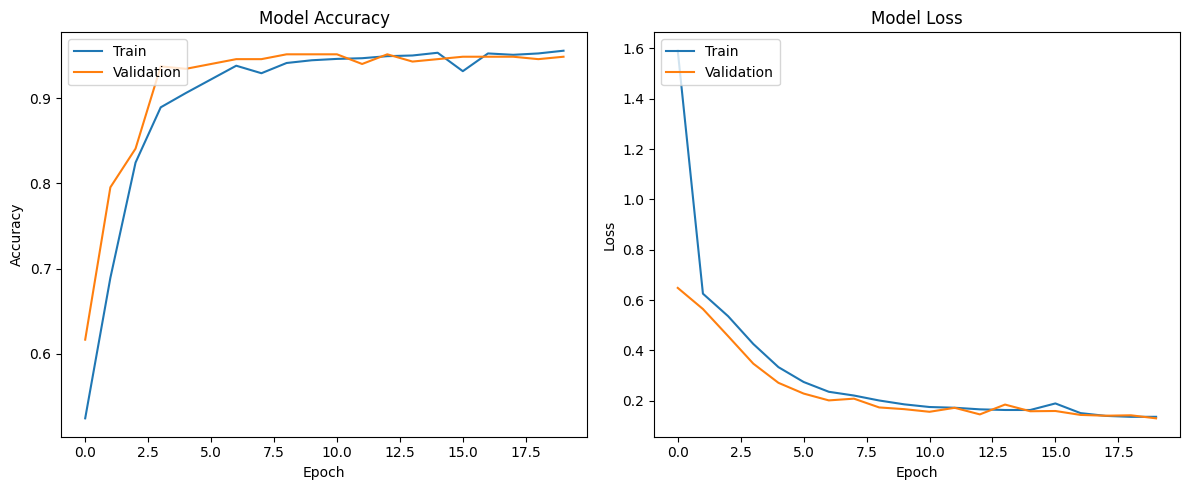

In [24]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the 'fit' method of your model
# It contains the history of training/validation loss and accuracy

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Cross Validation

In [25]:
import numpy as np
from sklearn.model_selection import KFold

# Example: Assuming `full_dataset` is a TensorFlow Dataset containing all your data
# Let's say `dataset_size` is the number of examples in `full_dataset`
dataset_size = len(list(dataset_path))  # This is not efficient, preferably know this a priori
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [26]:
def create_model():
    base_model = VGG16(include_top=False, input_shape=IMAGE_SIZE + [3], weights='imagenet')
    base_model.trainable = False

    inputs = Input(shape=IMAGE_SIZE + [3])
    x = base_model(inputs, training=False)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [27]:
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_index, test_index in kf.split(np.arange(dataset_size)):
    # Generate train and test subsets for the current fold
    train_data = data.take(train_index.size).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    test_data = data.skip(train_index.size).take(test_index.size).cache().prefetch(buffer_size=AUTOTUNE)

    model_cross_val = create_model()

    print(f'Training fold {fold_no}...')
    history = model_cross_val.fit(train_data, epochs=20, validation_data=test_data)

    scores = model_cross_val.evaluate(test_data)
    print(f'Score for fold {fold_no}: {model_cross_val.metrics_names[0]} of {scores[0]}; {model_cross_val.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no += 1

print('Average scores for all folds:')
print(f'Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'Loss: {np.mean(loss_per_fold)}')


Training fold 1...
Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 35s 442ms/step - accuracy: 0.5323 - loss: 2.3413 - val_accuracy: 0.4372 - val_loss: 0.5573
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.8140 - loss: 0.4292 - val_accuracy: 0.9221 - val_loss: 0.3108
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.9109 - loss: 0.2817 - val_accuracy: 0.9221 - val_loss: 0.2302
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.9213 - loss: 0.2325 - val_accuracy: 0.9351 - val_loss: 0.2030
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.9335 - loss: 0.2183 - val_accuracy: 0.9264 - val_loss: 0.2010
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.9430 - loss: 0.1960 - val_accuracy: 0.9221 - val_loss: 0.2320
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.9377 - loss: 0.1673 - val_accuracy: 0.9221 - val_loss: 0.2846
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.9518 - loss: 0

### Viewing cross validation resuts

Plotting Accuracy and Loss for Each Fold

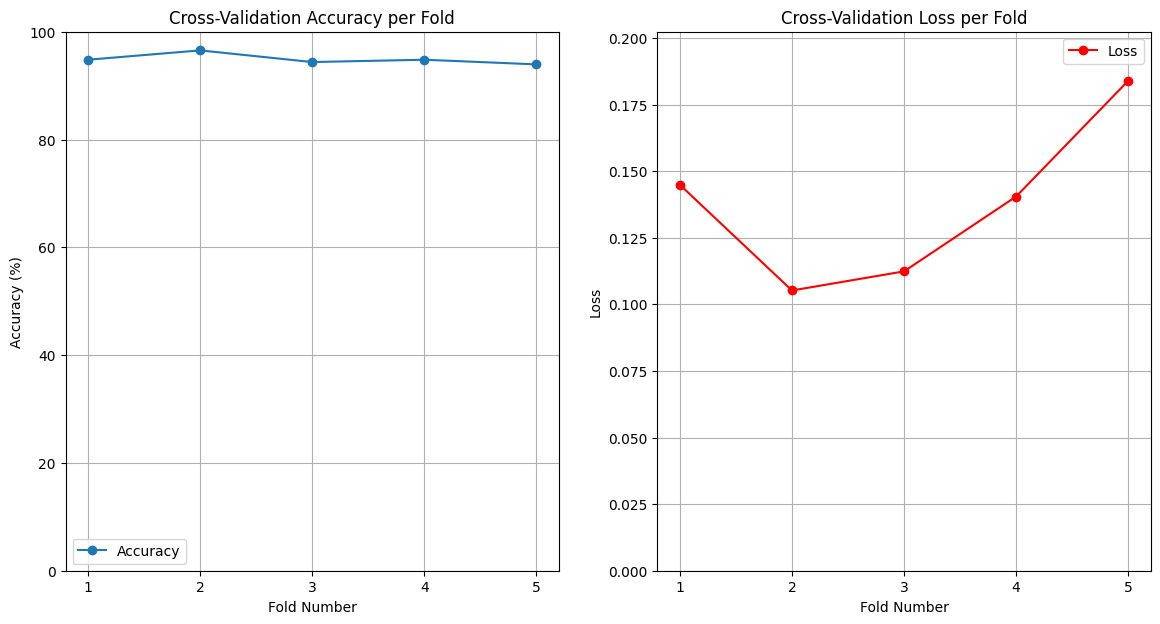

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming acc_per_fold and loss_per_fold are filled with the accuracy and loss data from each fold
fold_numbers = range(1, len(acc_per_fold) + 1)  # Fold numbers

plt.figure(figsize=(14, 7))

# Plotting accuracy per fold
plt.subplot(1, 2, 1)
plt.plot(fold_numbers, acc_per_fold, marker='o', label='Accuracy')
plt.title('Cross-Validation Accuracy per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy (%)')
plt.xticks(fold_numbers)
plt.ylim(0, 100)  # Set y-axis to start at 0 and end at 100%
plt.grid(True)
plt.legend()

# Plotting loss per fold
plt.subplot(1, 2, 2)
plt.plot(fold_numbers, loss_per_fold, marker='o', color='red', label='Loss')
plt.title('Cross-Validation Loss per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Loss')
plt.xticks(fold_numbers)
# Set an appropriate y-axis range for the loss values
plt.ylim(0, max(loss_per_fold) * 1.1)  # Adjust upper limit to 110% of the maximum value for better visualization
plt.grid(True)
plt.legend()

plt.show()


Boxplot for a Summary View

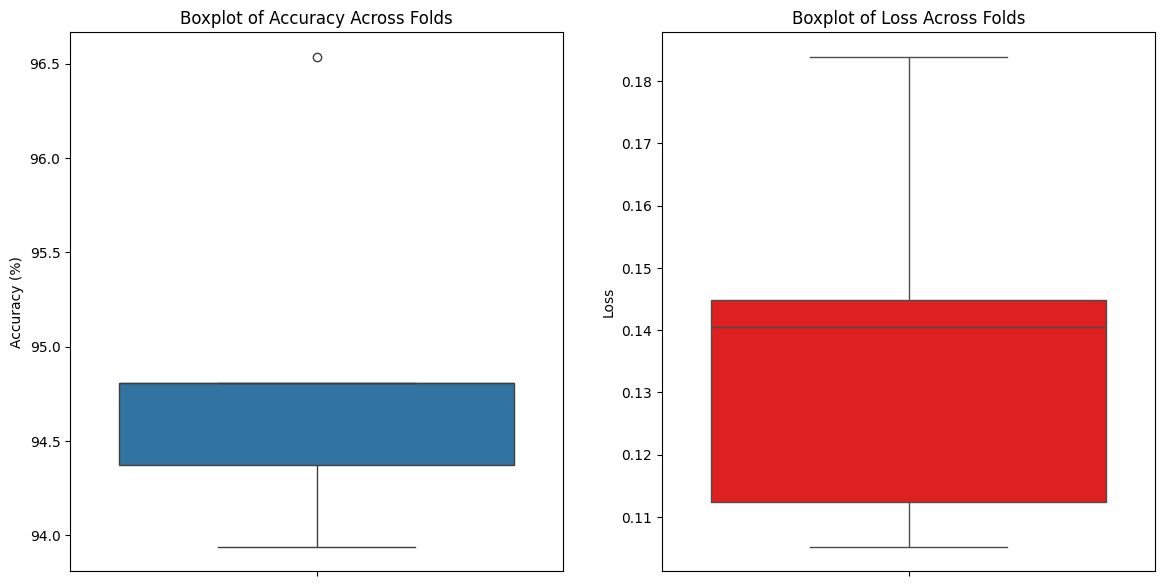

In [29]:
import seaborn as sns

plt.figure(figsize=(14, 7))

# Plotting accuracy boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=acc_per_fold)
plt.title('Boxplot of Accuracy Across Folds')
plt.ylabel('Accuracy (%)')

# Plotting loss boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=loss_per_fold, color='red')
plt.title('Boxplot of Loss Across Folds')
plt.ylabel('Loss')

plt.show()

Histogram of Performance

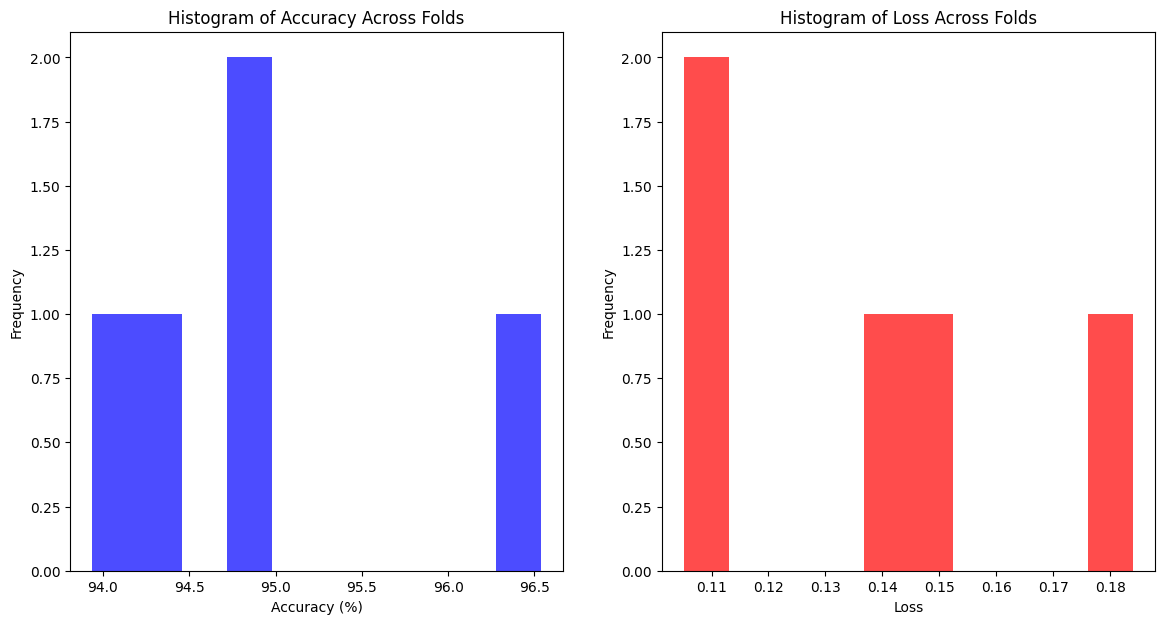

In [30]:
plt.figure(figsize=(14, 7))

# Histogram of accuracy
plt.subplot(1, 2, 1)
plt.hist(acc_per_fold, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Accuracy Across Folds')
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')

# Histogram of loss
plt.subplot(1, 2, 2)
plt.hist(loss_per_fold, bins=10, color='red', alpha=0.7)
plt.title('Histogram of Loss Across Folds')
plt.xlabel('Loss')
plt.ylabel('Frequency')

plt.show()


Combined Scatter Plot

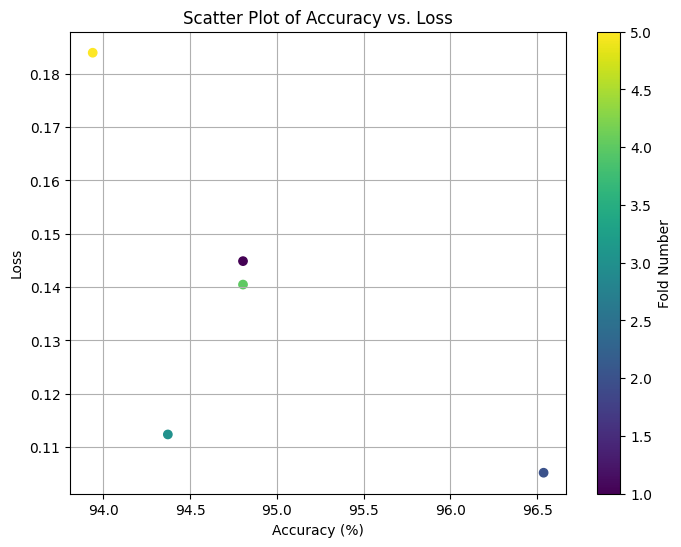

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(acc_per_fold, loss_per_fold, c=fold_numbers, cmap='viridis')
plt.colorbar(label='Fold Number')
plt.title('Scatter Plot of Accuracy vs. Loss')
plt.xlabel('Accuracy (%)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


# ResNet50 - DJI Panthom


## Importing and defining model

In [32]:
from tensorflow.keras.applications.resnet50 import ResNet50
# model = VGG16()

In [33]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [34]:
# Define the image size accepted by VGG16
IMAGE_SIZE = [224, 224]

# Define path to dataset if available
# train_path = 'path_to_train_dataset'
# valid_path = 'path_to_validation_dataset'

In [35]:
# Load VGG16 without the head and include preprocessing
resnet = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Don't train existing weights
resnet.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Specify the path to your dataset
dataset_path = '/content/drive/MyDrive/Final Year Project/AI/dataset_Fac'

print(dataset_path)
# Useful for getting number of classes
folders = dataset_path
folders

/content/drive/MyDrive/Final Year Project/AI/dataset_Fac


'/content/drive/MyDrive/Final Year Project/AI/dataset_Fac'

In [43]:
os.listdir(dataset_path)

['Drone_Fac', 'env']

In [44]:
# Adding custom layers
x = Flatten()(resnet.output)
x = Dense(1024, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)  # Change for binary classification

# Create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [45]:
# Model compilation for binary classification
model.compile(
  loss='binary_crossentropy',  # Change for binary classification
  optimizer='adam',
  metrics=['accuracy']
)

In [46]:
# View the structure of the model
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 126,350,209 (481.99 MB)

 Trainable params: 102,762,497 (392.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## Data preprocessing

In [47]:
data = tf.keras.utils.image_dataset_from_directory(dataset_path, image_size=(224,224))
data_iterator  = data.as_numpy_iterator()
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
print('max: ', batch[0].max())
print('min: ', batch[0].min())

Found 2270 files belonging to 2 classes.
max:  1.0
min:  0.0


In [48]:
print(batch[1])

[0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0]


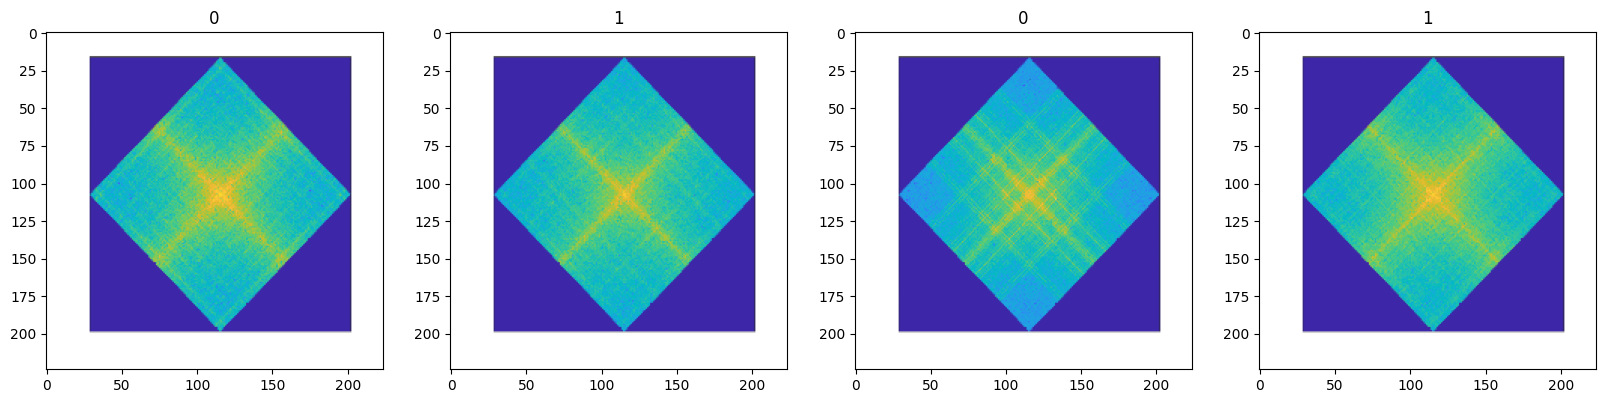

In [49]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [50]:
train_size = int(len(data)*0.7)

# Used to evaulate the data while we train
val_size = int(len(data)*0.2)

# Not seen until the end of the training
test_size = int(len(data)*0.1)

print('First Iteration :', train_size, val_size, test_size)


addition_data = train_size+val_size+test_size
if addition_data == len(data):
  pass
else:
  additional = len(data) - addition_data
  test_size += additional

print('Second Iteration :', train_size, val_size, test_size)
print('Total Length = ', len(data))
print('Sum of length = ', (train_size + val_size + test_size))

First Iteration : 49 14 7
Second Iteration : 49 14 8
Total Length =  71
Sum of length =  71


In [51]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size+val_size).take(test_size)
print(train_data)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [52]:
# Assuming train_data, val_data, and test_data are already batched and preprocessed
# Configure the datasets for performance
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

## Training the model

In [53]:
# Fit the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 59s 576ms/step - accuracy: 0.4834 - loss: 9.1388 - val_accuracy: 0.3996 - val_loss: 0.6933
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.4855 - loss: 0.6932 - val_accuracy: 0.6004 - val_loss: 0.6923
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.5145 - loss: 0.6930 - val_accuracy: 0.6004 - val_loss: 0.6914
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.5432 - loss: 0.6923 - val_accuracy: 0.6004 - val_loss: 0.6902
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.5550 - loss: 0.6915 - val_accuracy: 0.6004 - val_loss: 0.6891
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.5291 - loss: 0.6921 - val_accuracy: 0.6004 - val_loss: 0.6885
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.5315 - loss: 0.6919 - val_accuracy: 0.6004 - val_loss: 0.6876
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.5347 - loss: 0.6915 - val_accuracy: 

Implementing early stopping

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Set up early stopping
# early_stopping_monitor = EarlyStopping(
#     monitor='val_loss',
#     patience=5,  # Number of epochs with no improvement after which training will be stopped
#     verbose=1,
#     restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity.
# )

# # Fit the model with early stopping
# history = model.fit(
#     train_data,
#     validation_data=val_data,
#     epochs=100,  # Set a high number, early stopping will halt training once learning stagnates
#     callbacks=[early_stopping_monitor]
# )


In [61]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6339 - loss: 0.6795
Test accuracy: 0.625984251499176, Test loss: 0.6803739070892334


## Plot Performance

In [64]:
# Ensure test_data is correctly prepared and possibly reset the generator if it's one
if 'reset' in dir(test_data):
    test_data.reset()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

# Predictions
predictions = model.predict(test_data)
predictions = (predictions > 0.5).astype("int32")  # Adjust threshold based on ROC analysis if necessary

# Get true labels from the test_data
try:
    true_labels = np.concatenate([y for x, y in test_data], axis=0)
except ValueError as e:
    print("Error in extracting labels:", e)
    true_labels = None

# Check if true_labels and predictions are successfully obtained
if true_labels is not None and predictions is not None:
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predictions)
    print("Confusion Matrix:")
    print(cm)
else:
    print("Failed to compute confusion matrix due to missing labels or predictions.")


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6339 - loss: 0.6795
Test accuracy: 0.625984251499176, Test loss: 0.6803739070892334
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Confusion Matrix:
[[159   0]
 [ 95   0]]


In [62]:
# Predictions
predictions = model.predict(test_data)
predictions = (predictions > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Get true labels from the test_data
true_labels = np.concatenate([y for x, y in test_data], axis=0)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


In [63]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[159   0]
 [ 95   0]]


Confusion matrix, without normalization
Normalized confusion matrix


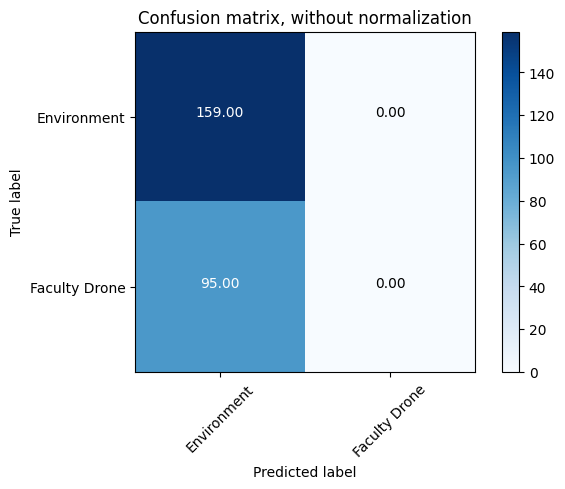

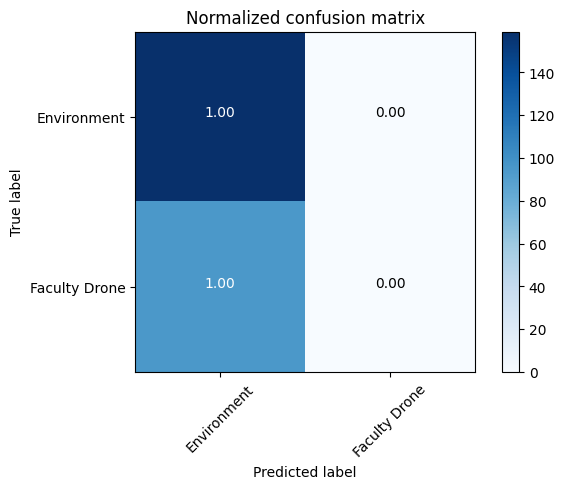

In [57]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming the confusion matrix 'cm' and class labels are already defined
# Example usage of the function
plt.figure()
plot_confusion_matrix(cm, classes=['Environment', 'Faculty Drone'], normalize=False,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cm, classes=['Environment', 'Faculty Drone'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [58]:
# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predictions, target_names=['Environment', 'Faculty Drone']))

Classification Report:
               precision    recall  f1-score   support

  Environment       0.63      1.00      0.77       159
Faculty Drone       0.00      0.00      0.00        95

     accuracy                           0.63       254
    macro avg       0.31      0.50      0.38       254
 weighted avg       0.39      0.63      0.48       254



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


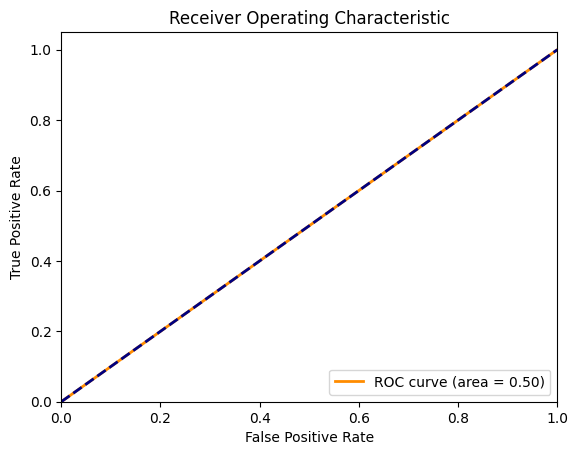

In [59]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

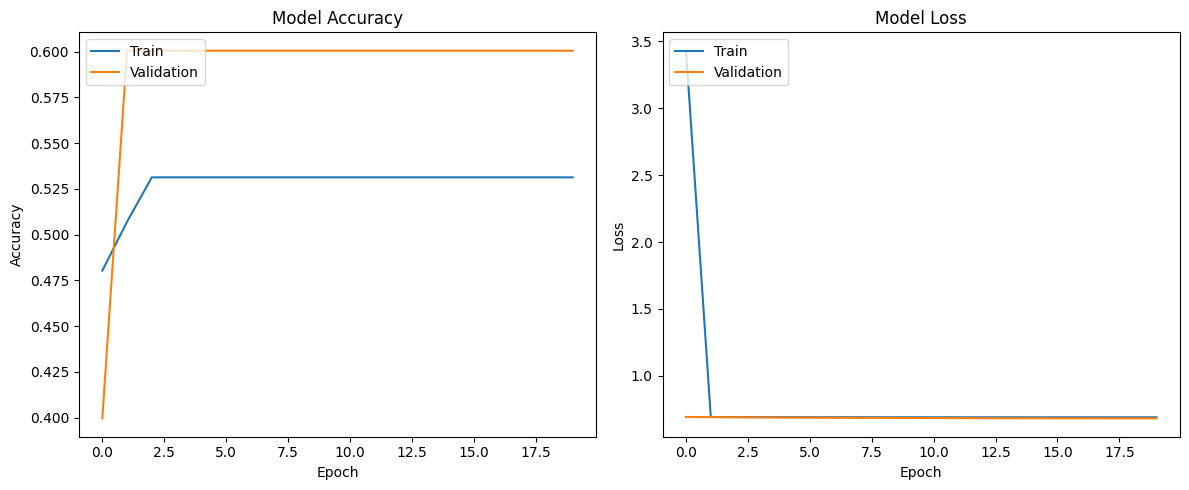

In [60]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the 'fit' method of your model
# It contains the history of training/validation loss and accuracy

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

# Example: Assuming `full_dataset` is a TensorFlow Dataset containing all your data
# Let's say `dataset_size` is the number of examples in `full_dataset`
dataset_size = len(list(dataset_path))  # This is not efficient, preferably know this a priori
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
def create_model():
    base_model = VGG16(include_top=False, input_shape=IMAGE_SIZE + [3], weights='imagenet')
    base_model.trainable = False

    inputs = Input(shape=IMAGE_SIZE + [3])
    x = base_model(inputs, training=False)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_index, test_index in kf.split(np.arange(dataset_size)):
    # Generate train and test subsets for the current fold
    train_data = data.take(train_index.size).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    test_data = data.skip(train_index.size).take(test_index.size).cache().prefetch(buffer_size=AUTOTUNE)

    model_cross_val = create_model()

    print(f'Training fold {fold_no}...')
    history = model_cross_val.fit(train_data, epochs=20, validation_data=test_data)

    scores = model_cross_val.evaluate(test_data)
    print(f'Score for fold {fold_no}: {model_cross_val.metrics_names[0]} of {scores[0]}; {model_cross_val.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no += 1

print('Average scores for all folds:')
print(f'Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'Loss: {np.mean(loss_per_fold)}')


Training fold 1...
Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 35s 442ms/step - accuracy: 0.5323 - loss: 2.3413 - val_accuracy: 0.4372 - val_loss: 0.5573
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.8140 - loss: 0.4292 - val_accuracy: 0.9221 - val_loss: 0.3108
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.9109 - loss: 0.2817 - val_accuracy: 0.9221 - val_loss: 0.2302
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.9213 - loss: 0.2325 - val_accuracy: 0.9351 - val_loss: 0.2030
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.9335 - loss: 0.2183 - val_accuracy: 0.9264 - val_loss: 0.2010
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.9430 - loss: 0.1960 - val_accuracy: 0.9221 - val_loss: 0.2320
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.9377 - loss: 0.1673 - val_accuracy: 0.9221 - val_loss: 0.2846
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.9518 - loss: 0

### Viewing cross validation resuts

Plotting Accuracy and Loss for Each Fold

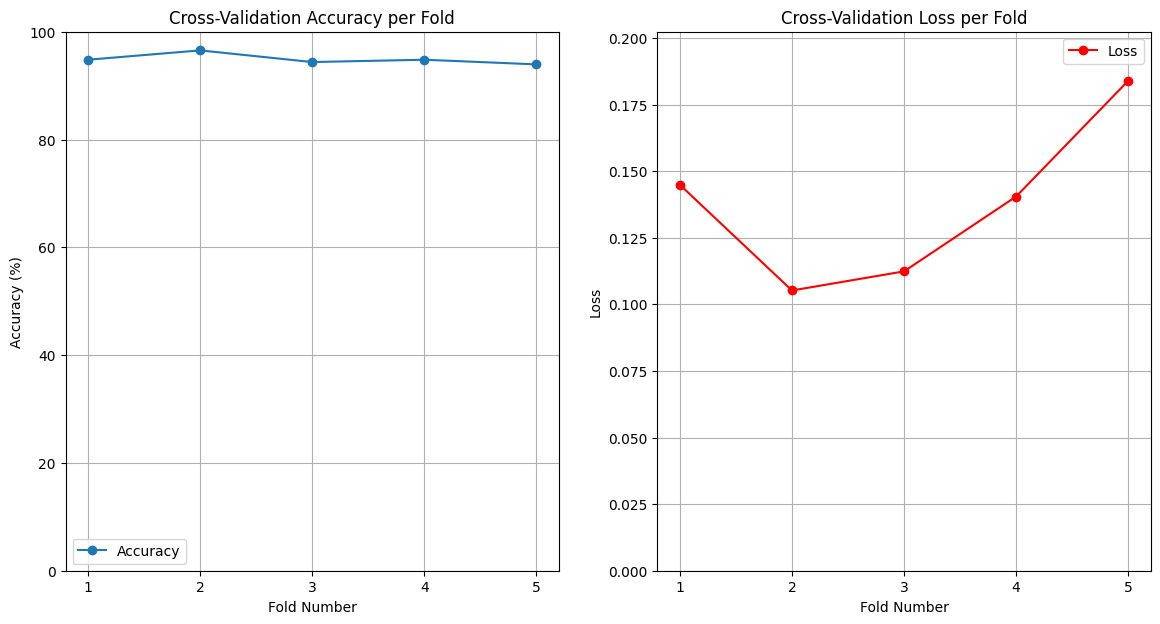

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming acc_per_fold and loss_per_fold are filled with the accuracy and loss data from each fold
fold_numbers = range(1, len(acc_per_fold) + 1)  # Fold numbers

plt.figure(figsize=(14, 7))

# Plotting accuracy per fold
plt.subplot(1, 2, 1)
plt.plot(fold_numbers, acc_per_fold, marker='o', label='Accuracy')
plt.title('Cross-Validation Accuracy per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy (%)')
plt.xticks(fold_numbers)
plt.ylim(0, 100)  # Set y-axis to start at 0 and end at 100%
plt.grid(True)
plt.legend()

# Plotting loss per fold
plt.subplot(1, 2, 2)
plt.plot(fold_numbers, loss_per_fold, marker='o', color='red', label='Loss')
plt.title('Cross-Validation Loss per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Loss')
plt.xticks(fold_numbers)
# Set an appropriate y-axis range for the loss values
plt.ylim(0, max(loss_per_fold) * 1.1)  # Adjust upper limit to 110% of the maximum value for better visualization
plt.grid(True)
plt.legend()

plt.show()


Boxplot for a Summary View

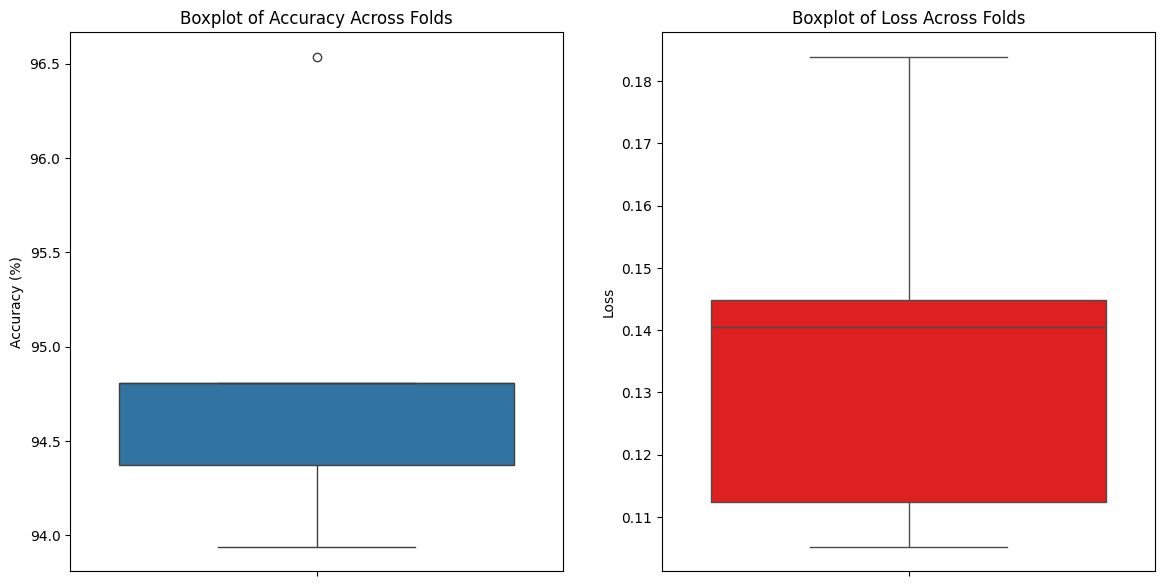

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 7))

# Plotting accuracy boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=acc_per_fold)
plt.title('Boxplot of Accuracy Across Folds')
plt.ylabel('Accuracy (%)')

# Plotting loss boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=loss_per_fold, color='red')
plt.title('Boxplot of Loss Across Folds')
plt.ylabel('Loss')

plt.show()

Histogram of Performance

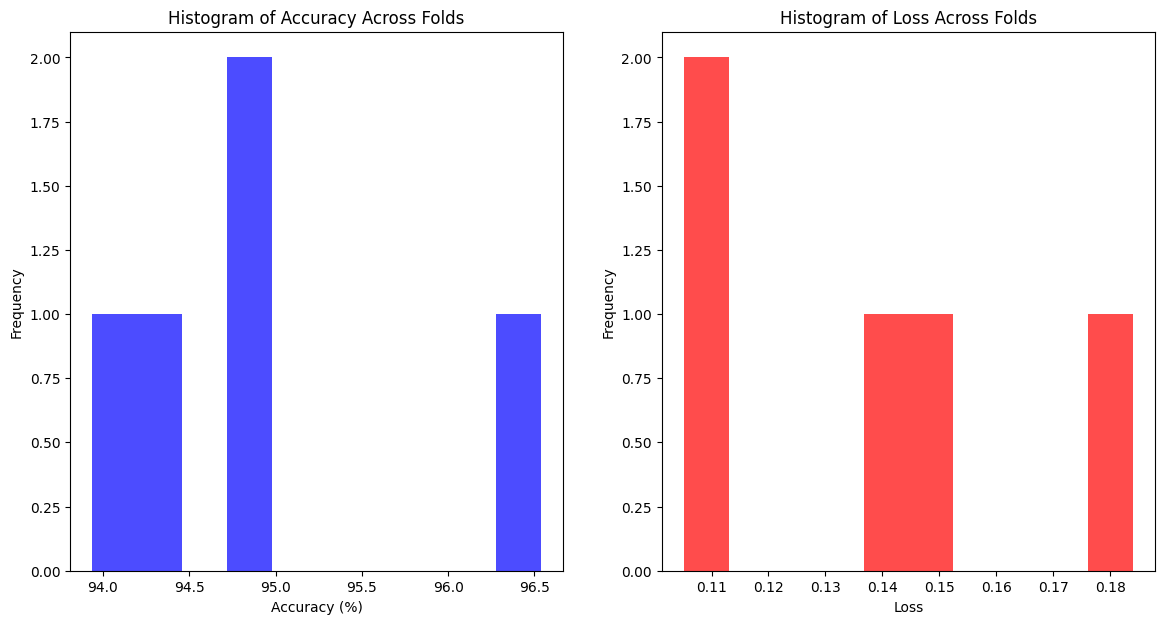

In [ ]:
plt.figure(figsize=(14, 7))

# Histogram of accuracy
plt.subplot(1, 2, 1)
plt.hist(acc_per_fold, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Accuracy Across Folds')
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')

# Histogram of loss
plt.subplot(1, 2, 2)
plt.hist(loss_per_fold, bins=10, color='red', alpha=0.7)
plt.title('Histogram of Loss Across Folds')
plt.xlabel('Loss')
plt.ylabel('Frequency')

plt.show()


Combined Scatter Plot

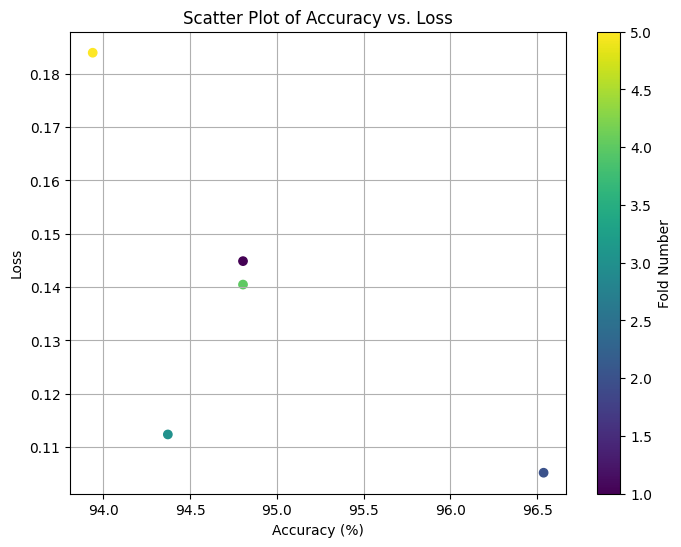

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(acc_per_fold, loss_per_fold, c=fold_numbers, cmap='viridis')
plt.colorbar(label='Fold Number')
plt.title('Scatter Plot of Accuracy vs. Loss')
plt.xlabel('Accuracy (%)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
